In [22]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt


In [28]:
pd_neighboorhood_score = pd.read_csv('../data/processed/difference_volt_per_neighboorhoud.csv').sort_values('neighborhood')
pd_neighboorhood_score.neighborhood =   pd_neighboorhood_score.neighborhood.str.lower()
pd_neighboorhood_score = pd_neighboorhood_score[~pd_neighboorhood_score.neighborhood.isin(['mobiel_stembureau'])] #missing in other dataset
pd_neighboorhood_score.reset_index(inplace = True, drop = True)

In [25]:
neighborhoods_gdf = geopandas.read_file("../data/raw/wijken.gpkg", layers = 'WIJKNAAM')
neighborhoods_gdf= neighborhoods_gdf[['WIJKNAAM', 'WIJKCODE','STADSDEELCODE','geometry']].sort_values('WIJKNAAM')
neighborhoods_gdf.WIJKNAAM = neighborhoods_gdf.WIJKNAAM.apply(str.lower).str.replace(' ','_').str.replace('-','')
neighborhoods_gdf=  neighborhoods_gdf[~neighborhoods_gdf.WIJKNAAM.isin(['haagse_bos','oostduinen'])] #missing in other dataset

neighborhoods_gdf.reset_index(inplace = True, drop = True)

In [29]:
#check if all the neighborhood names in both datasets line up
for neighborhood_in_gdf,neighborhood_in_pdf in zip(neighborhoods_gdf.WIJKNAAM, pd_neighboorhood_score.neighborhood):#check if all neighboorhood names are the same in both datsets
               if neighborhood_in_gdf != neighborhood_in_pdf:
                print(neighborhood_in_gdf,neighborhood_in_pdf)

van_stolkpark_en_scheveningse_bosjes van_stolkprk_en_schevbosjes


In [10]:
pdf_results_2021 = pd.read_csv('../data/raw/uitslag_2021_landelijk.csv')
percentage_volt_voters = pdf_results_2021[pdf_results_2021.parties == 'Volt'].sort_values('neighborhood')
percentage_volt_voters = percentage_volt_voters[~percentage_volt_voters.neighborhood.isin(['mobiel_stembureau'])]
percentage_volt_voters.reset_index(inplace= True, drop = True)

In [11]:
neighborhoods_gdf['dissimilar_votes_score'] = pd_neighboorhood_score['factor_percentage_difference']
neighborhoods_gdf['percentage_volt_voters'] = percentage_volt_voters['percentage']

In [12]:
neighborhoods_gdf.explore("dissimilar_votes_score", legend=True,cmap = 'Purples_r',legend_kwds = {'caption' : 'Votes for parties similar to Volt __________ Votes for parties dissimilair to Volt'})


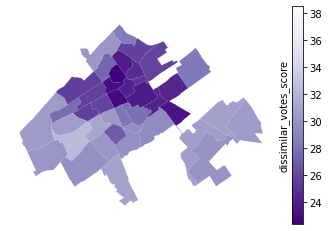

In [65]:
fig= neighborhoods_gdf.plot("dissimilar_votes_score", legend=True,cmap = 'Purples_r')
fig.set_ylabel('dissimilar_votes_score')#label for legend scores on the right
fig.yaxis.set_label_position("right")#use y-label as legend for the scores on the right. 

#remove the outline from the plot

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.spines['bottom'].set_visible(False)
fig.spines['left'].set_visible(False)
fig.get_xaxis().set_ticks([])
fig.get_yaxis().set_ticks([])
plt.savefig('../data/graphs/dissimilarity_score_volt_voters_per_neighbourhood.png')

In [79]:
neighborhoods_gdf.explore("percentage_volt_voters", legend=True, cmap = 'Purples')

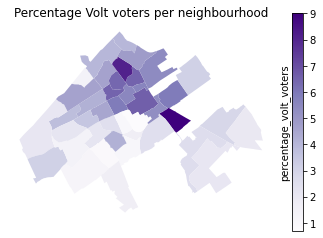

In [64]:
fig = neighborhoods_gdf.plot("percentage_volt_voters", legend=True, cmap = 'Purples')
fig.set_ylabel('percentage_volt_voters')#label for legend scores on the right
fig.yaxis.set_label_position("right")#use y-label as legend for the scores on the right. 

#remove the outline from the plot

fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
fig.spines['bottom'].set_visible(False)
fig.spines['left'].set_visible(False)
fig.get_xaxis().set_ticks([])
fig.get_yaxis().set_ticks([])
fig.set_title('Percentage Volt voters per neighbourhood')
plt.savefig('../data/graphs/percentage_volt_voters_per_neighbourhood.png')